In [4]:
library(readr) 
library(kernlab)
library(caret)

### A function to load multiple .CSV files from a directory

In [5]:
loadData<-function(dirPath){ 
  fileList <- list.files(dirPath, pattern=".csv",full.names = TRUE)
  for (eachFile in fileList){
    if (!exists("tmpDataset")){
      tmpDataset <- read.csv(eachFile,header = T)
    } else if (exists("tmpDataset")){
      tempData <-read.csv(eachFile,header = T)
      tmpDataset<-rbind(tmpDataset, tempData)
    }}
  return(tmpDataset)
}

### Load the data from local storage

In [6]:
benginDataset<- read_csv("1.benign.csv")



Parsed with column specification:
cols(
  .default = col_double()
)
See spec(...) for full column specifications.


In [7]:
gafgytDataset<-loadData("gafgyt_attacks")


In [8]:
miraiDataset<-loadData("mirai_attacks")

### Removing records in the dataset that contain NAs

In [9]:

benginDataset<-benginDataset[complete.cases(benginDataset), ]
gafgytDataset<-gafgytDataset[complete.cases(gafgytDataset), ]
miraiDataset<-miraiDataset[complete.cases(miraiDataset), ]


### Adding labels to the data

In [10]:
benginDataset$Type<-TRUE
gafgytDataset$Type<-FALSE
miraiDataset$Type<-FALSE

### Creating training set and test set

In [11]:
index <- 1:nrow(benginDataset)
testIndex <- sample(index, trunc(length(index)*20/100))
testSetBen <- benginDataset[testIndex,] # Create the Benign class for testing
testSet <- rbind(gafgytDataset,miraiDataset,testSetBen) # Pool the benign test instances with malicious instances to create the final testing dataset


In [12]:
trainSet <- benginDataset[-testIndex,] # Create the training set, this set contains benign instances only

### R code snippet for training the OCSVM

In [13]:
fit <- ksvm(Type~., data=trainSet, type="one-svc", kernel="rbfdot", kpar="automatic")
print(fit) # To print model details

Support Vector Machine object of class "ksvm" 

SV type: one-svc  (novelty detection) 
 parameter : nu = 0.2 

Gaussian Radial Basis kernel function. 
 Hyperparameter : sigma =  0.108626664437796 

Number of Support Vectors : 7957 

Objective Function Value : 569936.6 
Training error : 0.200156 


### Model Evaluation

In [14]:
predictions <- predict(fit, testSet[,1:(ncol(testSet)-1)], type="response") # make predictions

In [15]:
confusionMatrix(data=as.factor(predictions),reference=as.factor(testSet$Type))

Confusion Matrix and Statistics

          Reference
Prediction  FALSE   TRUE
     FALSE 725065   2002
     TRUE       0   7907
                                          
               Accuracy : 0.9973          
                 95% CI : (0.9972, 0.9974)
    No Information Rate : 0.9865          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.8863          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 1.0000          
            Specificity : 0.7980          
         Pos Pred Value : 0.9972          
         Neg Pred Value : 1.0000          
             Prevalence : 0.9865          
         Detection Rate : 0.9865          
   Detection Prevalence : 0.9892          
      Balanced Accuracy : 0.8990          
                                          
       'Positive' Class : FALSE           
            

### Remove any previously installed H2O packages for R.

In [16]:
if ("package:h2o" %in% search()) { detach("package:h2o", unload=TRUE) }
if ("h2o" %in% rownames(installed.packages())) { remove.packages("h2o") }

Removing package from 'C:/Users/harsh/anaconda3/envs/my new env/Lib/R/library'
(as 'lib' is unspecified)


### Download, install and initialize the H2O package for R.

In [17]:
pkgs <- c("RCurl","jsonlite")
for (pkg in pkgs) {
  if (! (pkg %in% rownames(installed.packages()))) { install.packages(pkg) }
}

In [18]:
install.packages("h2o", type="source", repos=(c("http://h2o-release.s3.amazonaws.com/h2o/latest_stable_R")))


----------------------------------------------------------------------

Your next step is to start H2O:
    > h2o.init()

For H2O package documentation, ask for help:
    > ??h2o

After starting H2O, you can use the Web UI at http://localhost:54321
For more information visit https://docs.h2o.ai

----------------------------------------------------------------------


Attaching package: 'h2o'

The following objects are masked from 'package:stats':

    cor, sd, var

The following objects are masked from 'package:base':

    %*%, %in%, &&, ||, apply, as.factor, as.numeric, colnames,
    colnames<-, ifelse, is.character, is.factor, is.numeric, log,
    log10, log1p, log2, round, signif, trunc



 Connection successful!

R is connected to the H2O cluster: 
    H2O cluster uptime:         3 days 6 hours 
    H2O cluster timezone:       Asia/Kolkata 
    H2O data parsing timezone:  UTC 
    H2O cluster version:        3.34.0.4 
    H2O cluster version age:    14 days, 20 hours and 33 minutes  
    H2O cluster name:           H2O_started_from_R_harsh_lqz504 
    H2O cluster total nodes:    1 
    H2O cluster total memory:   1.53 GB 
    H2O cluster total cores:    8 
    H2O cluster allowed cores:  8 
    H2O cluster healthy:        TRUE 
    H2O Connection ip:          localhost 
    H2O Connection port:        54321 
    H2O Connection proxy:       NA 
    H2O Internal Security:      FALSE 
    H2O API Extensions:         Amazon S3, Algos, AutoML, Core V3, TargetEncoder, Core V4 
    R Version:                  R version 3.6.1 (2019-07-05) 



	demo(h2o.kmeans)
	---- ~~~~~~~~~~

> # This is a demo of H2O's K-Means function
> # It imports a data set, parses it, and prints a summa

Warning message in summary.H2OFrame(prostate.hex):
"Approximated quantiles computed! If you are interested in exact quantiles, please pass the `exact_quantiles=TRUE` parameter."

 ID               CAPSULE          AGE             RACE           
 Min.   :  1.00   Min.   :0.0000   Min.   :43.00   Min.   :0.000  
 1st Qu.: 95.75   1st Qu.:0.0000   1st Qu.:62.00   1st Qu.:1.000  
 Median :190.50   Median :0.0000   Median :67.00   Median :1.000  
 Mean   :190.50   Mean   :0.4026   Mean   :66.04   Mean   :1.087  
 3rd Qu.:285.25   3rd Qu.:1.0000   3rd Qu.:71.00   3rd Qu.:1.000  
 Max.   :380.00   Max.   :1.0000   Max.   :79.00   Max.   :2.000  
 DPROS           DCAPS           PSA               VOL            
 Min.   :1.000   Min.   :1.000   Min.   :  0.300   Min.   : 0.00  
 1st Qu.:1.000   1st Qu.:1.000   1st Qu.:  4.900   1st Qu.: 0.00  
 Median :2.000   Median :1.000   Median :  8.664   Median :14.20  
 Mean   :2.271   Mean   :1.108   Mean   : 15.409   Mean   :15.81  
 3rd Qu.:3.000   3rd Qu.:1.000   3rd Qu.: 17.063   3rd Qu.:26.40  
 Max.   :4.000   Max.   :2.000   Max.   :139.700   Max.   :97.60  
 GLEASON        
 Min.   :0.000  
 1st Qu.:6.000  
 Median :6.

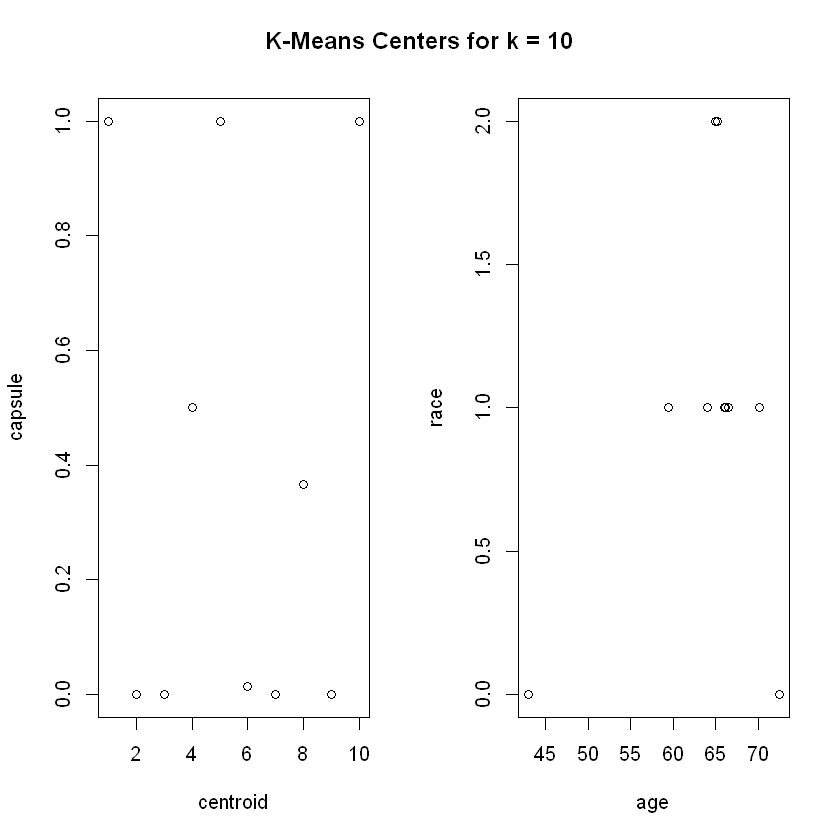

In [19]:
library(h2o)
localH2O = h2o.init()
demo(h2o.kmeans)

In [20]:
h2o.init(nthreads = -1)

 Connection successful!

R is connected to the H2O cluster: 
    H2O cluster uptime:         3 days 6 hours 
    H2O cluster timezone:       Asia/Kolkata 
    H2O data parsing timezone:  UTC 
    H2O cluster version:        3.34.0.4 
    H2O cluster version age:    14 days, 20 hours and 33 minutes  
    H2O cluster name:           H2O_started_from_R_harsh_lqz504 
    H2O cluster total nodes:    1 
    H2O cluster total memory:   1.53 GB 
    H2O cluster total cores:    8 
    H2O cluster allowed cores:  8 
    H2O cluster healthy:        TRUE 
    H2O Connection ip:          localhost 
    H2O Connection port:        54321 
    H2O Connection proxy:       NA 
    H2O Internal Security:      FALSE 
    H2O API Extensions:         Amazon S3, Algos, AutoML, Core V3, TargetEncoder, Core V4 
    R Version:                  R version 3.6.1 (2019-07-05) 



### R code snippet for training the Autoencoder

In [21]:
data<-trainSet[,-116]
trainH2o<-as.h2o(data, destination_frame="trainH2o.hex")

  |======================================================================| 100%


### Building a deep autoencoder learning model using trainH2o

In [22]:
train.IoT <- h2o.deeplearning(x = names(trainH2o), training_frame = trainH2o, activation = "Tanh", autoencoder = TRUE, hidden = c(50,2,50), l1 = 1e-4, epochs = 100, variable_importances=T, model_id = "train.IoT", reproducible = TRUE, ignore_const_cols = FALSE, seed = 123)

  |======================================================================| 100%


In [23]:
h2o.saveModel(train.IoT, path="train.IoT", force = TRUE)

[1] "C:\\Users\\harsh\\Desktop\\DISASTER RECOVERY\\train.IoT\\train.IoT"

In [24]:
train.IoT <- h2o.loadModel("./train.IoT/train.IoT")

In [25]:
train.IoT

Model Details:

H2OAutoEncoderModel: deeplearning
Model ID:  train.IoT 
Status of Neuron Layers: auto-encoder, gaussian distribution, Quadratic loss, 11,917 weights/biases, 161.7 KB, 3,963,900 training samples, mini-batch size 1
  layer units  type dropout       l1       l2 mean_rate rate_rms momentum
1     1   115 Input  0.00 %       NA       NA        NA       NA       NA
2     2    50  Tanh  0.00 % 0.000100 0.000000  0.924003 0.214013 0.000000
3     3     2  Tanh  0.00 % 0.000100 0.000000  0.918412 0.227361 0.000000
4     4    50  Tanh  0.00 % 0.000100 0.000000  0.899792 0.256023 0.000000
5     5   115  Tanh      NA 0.000100 0.000000  0.901002 0.249853 0.000000
  mean_weight weight_rms mean_bias bias_rms
1          NA         NA        NA       NA
2   -0.000173   0.035789 -0.027397 0.115609
3    0.026441   0.400408 -0.032157 0.024326
4   -0.061525   0.535149 -0.086027 0.426728
5   -0.001098   0.028127 -0.003867 0.074852


H2OAutoEncoderMetrics: deeplearning
** Reported on training d

### Function to detect anomalies in a dataset. 

In [26]:
train.anon = h2o.anomaly(train.IoT, trainH2o, per_feature=FALSE)

In [27]:
head(train.anon) 

Reconstruction.MSE
0.16025079
0.18515796
0.18854536
0.16933260
0.08308816
0.05741040


In [29]:
err <- as.data.frame(train.anon)

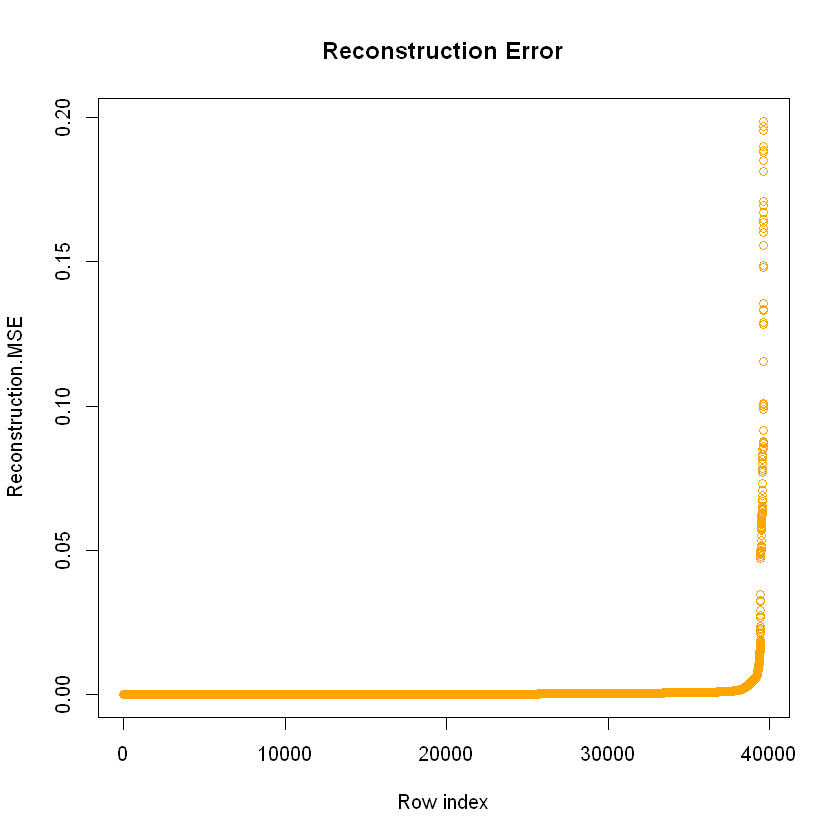

In [30]:
plot(sort(err[,1]), main='Reconstruction Error',xlab="Row index", ylab="Reconstruction.MSE",col="orange")

### Define the threshold based on Reconstruction.MSE of training

In [31]:
threshold<-0.02

In [33]:
train.IoT <- h2o.loadModel("./train.IoT/train.IoT")

In [36]:
testH2o<-as.h2o(data, destination_frame="trainH2o.hex") 

In [37]:
data<-newtestSet[,-116]

In [38]:
testH2o<-as.h2o(data, destination_frame="trainH2o.hex") 

  |======================================================================| 100%


In [39]:
test.anon = h2o.anomaly(train.IoT,testH2o, per_feature=FALSE) 

In [40]:
err <- as.data.frame(test.anon)

### Model evaluation

In [41]:
prediction <- err$Reconstruction.MSE<=threshold

In [42]:
confusionMatrix(data=as.factor(prediction),reference=as.factor(newtestSet$Type)) 

Confusion Matrix and Statistics

          Reference
Prediction  FALSE   TRUE
     FALSE 483435     20
     TRUE       0   4959
                                     
               Accuracy : 1          
                 95% CI : (0.9999, 1)
    No Information Rate : 0.9898     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 0.998      
 Mcnemar's Test P-Value : 2.152e-05  
                                     
            Sensitivity : 1.0000     
            Specificity : 0.9960     
         Pos Pred Value : 1.0000     
         Neg Pred Value : 1.0000     
             Prevalence : 0.9898     
         Detection Rate : 0.9898     
   Detection Prevalence : 0.9898     
      Balanced Accuracy : 0.9980     
                                     
       'Positive' Class : FALSE      
                                     